In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [26]:
dtype1 = {"TDB":"int32"}
usecols1 = ["TDB","DateTime", "電力需要"]
df_1 = pd.read_csv("電力需給データ.csv", parse_dates=["DateTime"], index_col=["DateTime"], encoding="shift_jis", dtype=dtype1, usecols=usecols1)
df_1 = df_1.dropna()
df_1 = df_1.groupby(["TDB"])
df_1 = df_1.resample("H").mean()
df_1

TDB   電力需要
TDB       DateTime                               
10132818  2011-01-01 00:00:00   10132818.0  434.9
          2011-01-01 01:00:00   10132818.0  451.8
          2011-01-01 02:00:00   10132818.0  449.0
          2011-01-01 03:00:00   10132818.0  439.6
          2011-01-01 04:00:00   10132818.0  424.8
...                                    ...    ...
900001432 2020-04-07 19:00:00  900001432.0   86.0
          2020-04-07 20:00:00  900001432.0   84.0
          2020-04-07 21:00:00  900001432.0   79.0
          2020-04-07 22:00:00  900001432.0   73.0
          2020-04-07 23:00:00  900001432.0   68.0

[733680 rows x 2 columns]

In [27]:
dtype2 = {"BlockNo":"int32", "TDB":"int32"}
usecols2 = ["TDB","DateTime", "外気温"]
df_2 = pd.read_csv("電力需給データ_外気温データ.csv", parse_dates=["DateTime"], index_col=["DateTime"], encoding="shift_jis", dtype=dtype2, usecols=usecols2)
df_2 = df_2.dropna()
df_2 = df_2.groupby(["TDB"])
df_2 = df_2.resample("H").mean()
df_2

TDB   外気温
TDB       DateTime                              
10132818  2010-01-02 01:00:00   10132818.0   2.2
          2010-01-02 02:00:00   10132818.0   1.6
          2010-01-02 03:00:00   10132818.0   1.5
          2010-01-02 04:00:00   10132818.0   1.3
          2010-01-02 05:00:00   10132818.0   1.2
...                                    ...   ...
900001432 2020-04-06 20:00:00  900001432.0  19.8
          2020-04-06 21:00:00  900001432.0  19.7
          2020-04-06 22:00:00  900001432.0  19.7
          2020-04-06 23:00:00  900001432.0  19.4
          2020-04-07 00:00:00  900001432.0  18.9

[899520 rows x 2 columns]

In [31]:
df_3 = pd.concat([df_1, df_2], axis=1, join = "inner",sort=1)
df_3 = df_3.dropna()
df_3["外気温"] = round(df_3["外気温"]*2)/2
df_3["電力需要"] = round(df_3["電力需要"]*2)/2
print(df_3)

df_4 = df_3.drop(["TDB"],axis=1)
df_4 = df_4.reset_index()
df_4 = df_4.drop(["DateTime"],axis=1)
df_4 = df_4.groupby(["TDB","外気温"]).mean()
df_4

                                       TDB   電力需要          TDB   外気温
TDB       DateTime                                                  
10132818  2011-01-01 00:00:00   10132818.0  435.0   10132818.0  -1.5
          2011-01-01 01:00:00   10132818.0  452.0   10132818.0  -2.0
          2011-01-01 02:00:00   10132818.0  449.0   10132818.0  -1.5
          2011-01-01 03:00:00   10132818.0  439.5   10132818.0  -1.5
          2011-01-01 04:00:00   10132818.0  425.0   10132818.0  -1.5
...                                    ...    ...          ...   ...
900001432 2020-04-06 20:00:00  900001432.0   82.0  900001432.0  20.0
          2020-04-06 21:00:00  900001432.0   78.0  900001432.0  19.5
          2020-04-06 22:00:00  900001432.0   75.0  900001432.0  19.5
          2020-04-06 23:00:00  900001432.0   70.0  900001432.0  19.5
          2020-04-07 00:00:00  900001432.0   66.0  900001432.0  19.0

[681867 rows x 4 columns]


電力需要
TDB       外気温              
10132818  -14.0  495.000000
          -13.5  497.000000
          -13.0  494.500000
          -12.5  519.500000
          -12.0  498.566667
...                     ...
900001432  32.5  135.892857
           33.0  137.528090
           33.5  141.333333
           34.0  141.142857
           34.5  148.000000

[807 rows x 1 columns]

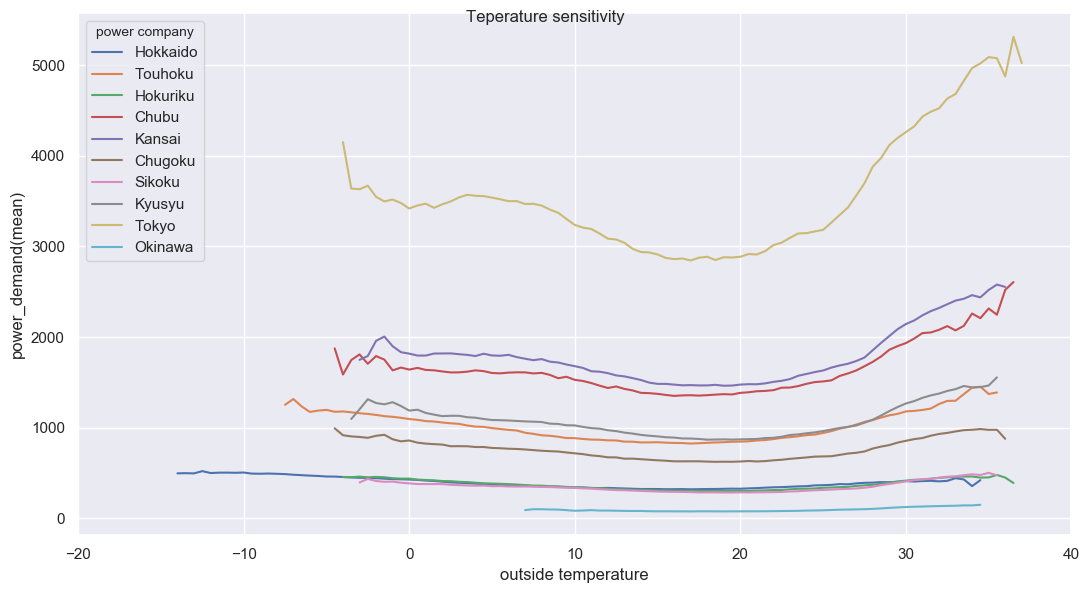

In [30]:
fig = plt.figure(figsize=(11, 6), dpi=100, facecolor='w', linewidth=0, edgecolor='w',tight_layout=True)
ax = fig.add_subplot(1,1,1,xlabel="outside temperature", ylabel="power_demand(mean)", xlim=(-20.0,40.0)) 
fig.suptitle("Teperature sensitivity")
#col_list = ["北海道電力","東北電力","北陸電力","中部電力","関西電力","中国電力","四国電力","九州電力","東京電力","沖縄電力"]
col_list = ["Hokkaido","Touhoku","Hokuriku","Chubu","Kansai","Chugoku","Sikoku","Kyusyu","Tokyo","Okinawa"]

for key, grp in df_4.reset_index().groupby("TDB"):
    ax.plot(grp["外気温"],grp["電力需要"],label=key)
    ax.legend(title="power company",labels=col_list,loc="best")
    plt.savefig("homework_png")
plt.show()


In [32]:
df1 = pd.read_csv("郵便番号_電力会社関係表.csv", dtype=object,engine="python")
df1

,�ｻｿ驛ｵ萓ｿ逡ｪ蜿ｷ,驛ｽ驕灘ｺ懃恁繧ｳ繝ｼ繝�,蝨ｰ譁ｹ蜈ｬ蜈ｱ蝗｣菴薙さ繝ｼ繝�,蟶ょ玄逕ｺ譚�,髮ｻ蜉帑ｼ夂､ｾ,讓咎ｫ�
0,001-0010,1,11029,譛ｭ蟷悟ｸ�,10132818,20.3140945
1,001-0011,1,11029,譛ｭ蟷悟ｸ�,10132818,18.7278996
2,001-0012,1,11029,譛ｭ蟷悟ｸ�,10132818,17.3379326
3,001-0013,1,11029,譛ｭ蟷悟ｸ�,10132818,16.2785015
4,001-0014,1,11029,譛ｭ蟷悟ｸ�,10132818,15.7723866
...,...,...,...,...,...,...
105214,999-8522,6,64611,驕贋ｽ千伴,100034834,7.1311278
105215,999-8523,6,64611,驕贋ｽ千伴,100034834,6.1283526
105216,999-8524,6,64611,驕贋ｽ千伴,100034834,7.9809227
105217,999-8525,6,64611,驕贋ｽ千伴,100034834,4.9963899
